# Assignment 9

## Preparations

### Installing PyDrive

In [12]:
!pip install -U -q PyDrive



In [13]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


### Importing modules

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "EETBS" in file1['title']:
        Folder_ID_Data_Driven_Building_Simulation= file1['id']

print(Folder_ID_Data_Driven_Building_Simulation)

file_list_Data_Driven_Building_Simulation = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data_Driven_Building_Simulation}).GetList()

for file2 in file_list_Data_Driven_Building_Simulation:  
    if "Data" in file2['title']:
        Folder_ID_Data= file2['id']
        
for file4 in file_list_Data_Driven_Building_Simulation:
  
    if "Figures" in file4['title']:
        Folder_ID_Figures= file4['id']        
        
        
file_list_Data = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data}).GetList()

for file3 in file_list_Data:  
    if "irradiance_2014_gen.csv" in file3['title']:
        print ("irradiance_2014_gen.csv exists")
        ID_irradiance_2014_gen= file3['id']
        file_irradiance_2014_gen = drive.CreateFile({'id': ID_irradiance_2014_gen})
        file_irradiance_2014_gen.GetContentFile('irradiance_2014_gen.csv') 
    if "consumption_5545.csv" in file3['title']:
        print ("consumption_5545.csv exists")
        ID_consumption_5545= file3['id']
        file_consumption_5545 = drive.CreateFile({'id': ID_consumption_5545})
        file_consumption_5545.GetContentFile('consumption_5545.csv') 
    if "Austin_weather_2014.csv" in file3['title']:
        print ("Austin_weather_2014.csv exists")
        ID_Austin_weather_2014= file3['id']
        file_Austin_weather_2014 = drive.CreateFile({'id': ID_Austin_weather_2014})
        file_Austin_weather_2014.GetContentFile('Austin_weather_2014.csv')

  

1caB1_U3vNNcNT6p9OE8ue7GbyOAxs2Oj
irradiance_2014_gen.csv exists
consumption_5545.csv exists
Austin_weather_2014.csv exists


In [18]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

## Assignment

In [80]:
DF_consumption=pd.read_csv(ConsumptionFileName,index_col=0)
DF_weather = pd.read_csv(TemperatureFileName, sep=";",index_col=0)
DF_irradianceSource = pd.read_csv(IrradianceFileName,sep=";",index_col=1)

In [81]:
previousIndex_consumption = DF_consumption.index
newParsedIndex_consumption = pd.to_datetime(previousIndex_consumption,utc=True)
DF_consumption.index = newParsedIndex_consumption

previousIndex_weather = DF_weather.index
newParsedIndex_weather = pd.to_datetime(previousIndex_weather,utc=True) #No UTC, it already has it
DF_weather.index = newParsedIndex_weather

previousIndex_irradianceSource = DF_irradianceSource.index
newParsedIndex_irradianceSource = pd.to_datetime(previousIndex_irradianceSource,utc=True)
DF_irradianceSource.index = newParsedIndex_irradianceSource

In [82]:
DF_consumption = DF_consumption.rename(columns={"air conditioner_5545":"AC Consumtion [W]"})

In [83]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature = DF_temperature.rename(columns={"temperature":"Temperature [°F]"})

In [84]:
DF_irradiance = DF_irradianceSource[["gen"]]
DF_irradiance = DF_irradiance.rename(columns={"gen":"Generation [??]"})
DF_irradiance.loc[DF_irradiance["Generation"]<0,"Generation"] = 0

### Point A: Plot

#### Data

In [95]:
PlotA_consumption = DF_consumption.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
PlotA_temperature = DF_temperature.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
PlotA_irradiance = DF_irradiance.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]

#### Plots

Text(0, 0.5, 'Consumtption (W)')

<Figure size 432x288 with 0 Axes>

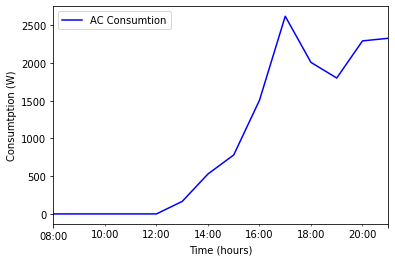

In [122]:
plt.figure()
PlotA_consumption.plot(color="blue")
plt.xlabel("Time (hours)")
plt.ylabel("Consumtption (W)")

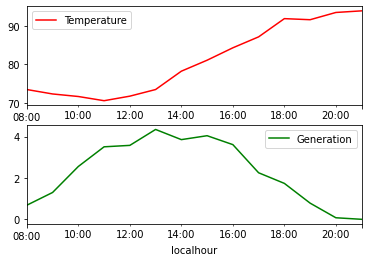

In [121]:
figure, axes = plt.subplots(2,1)
PlotA_temperature.plot(ax=axes[0],color="red")
PlotA_irradiance.plot(ax=axes[1],color="green")

### Point B: New Consumption Data Frame

In [179]:
DF_consumption["Hours"] = DF_consumption.index.hour
DF_consumption["Day of the Week"] = DF_consumption.index.isocalendar().day # Monday is 1
DF_consumption["Month"] = DF_consumption.index.month
DF_consumption["Week of the Year"] = DF_consumption.index.isocalendar().week # I don't understand why but this function considers the last three days of the years as part of the first week of the following year
DF_consumption["Weekend Flag"] = np.where(DF_consumption.index.dayofweek<5,0,1)

DF_consumption

,AC Consumtion,Hours,Day of the Week,Month,Week of the Year,Weekend Flag
2014-01-01 06:00:00+00:00,0.0,6,3,1,1,0
2014-01-01 07:00:00+00:00,0.0,7,3,1,1,0
2014-01-01 08:00:00+00:00,0.0,8,3,1,1,0
2014-01-01 09:00:00+00:00,0.0,9,3,1,1,0
2014-01-01 10:00:00+00:00,0.0,10,3,1,1,0
...,...,...,...,...,...,...
2014-12-31 01:00:00+00:00,NaN,1,3,12,1,0
2014-12-31 02:00:00+00:00,NaN,2,3,12,1,0
2014-12-31 03:00:00+00:00,NaN,3,3,12,1,0
2014-12-31 04:00:00+00:00,NaN,4,3,12,1,0
